In [991]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go



## **Load Dataset**

In [992]:
df = pd.read_csv("MLDataset.csv")

df.head()


,Name,Registration No,Age,How many hours do you spend on social media daily?,Which platforms do you use the most?,At what time do you use social media the most?,Do you use social media while studying?,Average sleep duration per night,How often do you procrastinate because of social media?,Do you use your phone after getting into bed?,Do you feel social media affects your concentration?,How satisfied are you with your productivity?
0,Aadhithyan M,12315973,19,2–3 hours,Instagram,Evening,Sometimes,6–7 hours,Sometimes,Yes,Sometimes,Neutral
1,Aarav Arudia,12315402,23,More than 5 hours,Snapchat,Late Night (after 11 PM),Frequently,5–6 hours,Frequently,Yes,Sometimes,Very dissatisfied
2,Aaron Cherian Mathew,12405971,20,3–5 hours,Instagram,Evening,Sometimes,5–6 hours,Rarely,Yes,Yes,Neutral
3,Aashish Raj,12313234,22,0–1 hours,LinkedIn,Afternoon,Never,7–8 hours,Rarely,Yes,No,Neutral
4,Aayush Sharma,12317299,24,0–1 hours,LinkedIn,Afternoon,Never,6–7 hours,Never,No,No,Satisfied


In [993]:
df.shape

(344, 12)

## **Basic Data Understanding**

In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Name                                                         344 non-null    object
 1   Registration No                                              344 non-null    int64 
 2   Age                                                          344 non-null    int64 
 3   How many hours do you spend on social media daily?           344 non-null    object
 4   Which platforms do you use the most?                         344 non-null    object
 5   At what time do you use social media the most?               344 non-null    object
 6     Do you use social media while studying?                    344 non-null    object
 7     Average sleep duration per night                           344 non-null    object
 8   

In [995]:
df.describe()

,Registration No,Age
count,3.440000e+02,344.000000
mean,1.233040e+07,21.276163
std,5.311017e+04,1.834846
min,1.220494e+07,17.000000
25%,1.231111e+07,20.000000
50%,1.231651e+07,21.000000
75%,1.232170e+07,23.000000
max,1.252952e+07,24.000000


In [996]:
df.nunique().sort_values(ascending=False)


,0
Registration No,344
Name,340
Age,8
Which platforms do you use the most?,8
How many hours do you spend on social media daily?,5
Average sleep duration per night,5
How satisfied are you with your productivity?,5
At what time do you use social media the most?,4
Do you use social media while studying?,4
How often do you procrastinate because of social media?,4


## **Missing Values Analysis**

In [997]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


,0


In [998]:
df.columns

Index(['Name', 'Registration No', 'Age',
       'How many hours do you spend on social media daily? ',
       'Which platforms do you use the most? ',
       'At what time do you use social media the most? ',
       '  Do you use social media while studying?  ',
       '  Average sleep duration per night  ',
       '  How often do you procrastinate because of social media?  ',
       '  Do you use your phone after getting into bed?  ',
       '  Do you feel social media affects your concentration?  ',
       '  How satisfied are you with your productivity?  '],
      dtype='object')

In [999]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

num_cols

Index(['Registration No', 'Age'], dtype='object')

## **Column Renaming**

In [1000]:
column_rename_map = {
    "Age": "age",
    "How many hours do you spend on social media daily?": "daily_social_media_hours",
    "Which platforms do you use the most?": "primary_social_media_platform",
    "At what time do you use social media the most?": "peak_social_media_time",
    "Do you use social media while studying?": "use_social_media_while_studying",
    "Average sleep duration per night": "avg_sleep_hours",
    "How often do you procrastinate because of social media?": "procrastination_frequency",
    "Do you use your phone after getting into bed?": "phone_use_after_bed",
    "Do you feel social media affects your concentration?": "social_media_affects_concentration",
    "How satisfied are you with your productivity?": "productivity_satisfaction"
}


In [1001]:
# Clean hidden characters (VERY important for survey data)

df.columns = (
    df.columns
      .str.replace("\n", " ", regex=False)
      .str.strip()
)


In [1002]:
df.columns

Index(['Name', 'Registration No', 'Age',
       'How many hours do you spend on social media daily?',
       'Which platforms do you use the most?',
       'At what time do you use social media the most?',
       'Do you use social media while studying?',
       'Average sleep duration per night',
       'How often do you procrastinate because of social media?',
       'Do you use your phone after getting into bed?',
       'Do you feel social media affects your concentration?',
       'How satisfied are you with your productivity?'],
      dtype='object')

In [1003]:
df.rename(columns=column_rename_map, inplace=True)


In [1004]:
df.head()

,Name,Registration No,age,daily_social_media_hours,primary_social_media_platform,peak_social_media_time,use_social_media_while_studying,avg_sleep_hours,procrastination_frequency,phone_use_after_bed,social_media_affects_concentration,productivity_satisfaction
0,Aadhithyan M,12315973,19,2–3 hours,Instagram,Evening,Sometimes,6–7 hours,Sometimes,Yes,Sometimes,Neutral
1,Aarav Arudia,12315402,23,More than 5 hours,Snapchat,Late Night (after 11 PM),Frequently,5–6 hours,Frequently,Yes,Sometimes,Very dissatisfied
2,Aaron Cherian Mathew,12405971,20,3–5 hours,Instagram,Evening,Sometimes,5–6 hours,Rarely,Yes,Yes,Neutral
3,Aashish Raj,12313234,22,0–1 hours,LinkedIn,Afternoon,Never,7–8 hours,Rarely,Yes,No,Neutral
4,Aayush Sharma,12317299,24,0–1 hours,LinkedIn,Afternoon,Never,6–7 hours,Never,No,No,Satisfied


In [1005]:
df['daily_social_media_hours']

,daily_social_media_hours
0,2–3 hours
1,More than 5 hours
2,3–5 hours
3,0–1 hours
4,0–1 hours
...,...
339,3–5 hours
340,0–1 hours
341,More than 5 hours
342,2–3 hours


## **Duplicate Records**

In [1006]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicates: 0


# **EDA**

## **Age Distribution of Participants**

In [1007]:
# on Age Column

fig = px.histogram(
    df,
    x="age",
    nbins=15,
    title="Age Distribution of Participants",
    labels={"age": "Age"},
    color="age"
)
fig.show()


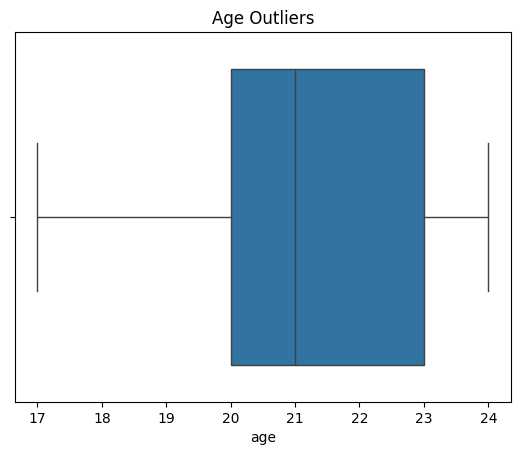

In [1008]:
sns.boxplot(x=df["age"])
plt.title("Age Outliers")
plt.show()


## **Daily Social Media Usage Pattern**

In [1009]:
fig = px.bar(
    df["daily_social_media_hours"].value_counts().reset_index(),
    x="count",
    y="daily_social_media_hours",
    orientation="h",
    title="Daily Time Spent on Social Media",
    labels={"daily_social_media_hours": "Daily Usage", "count": "Number of Students"},
    color="daily_social_media_hours",
)
fig.show()


In [1010]:
(df["daily_social_media_hours"].value_counts().reset_index())

,daily_social_media_hours,count
0,2–3 hours,126
1,More than 5 hours,95
2,3–5 hours,88
3,1–2 hours,22
4,0–1 hours,13


## **Platform Preference Analysis**

In [1011]:
fig = px.pie(
    df,
    names="primary_social_media_platform",
    title="Most Used Social Media Platforms"
)
fig.show()


## **Peak Usage Time Behavior**

In [1012]:
fig = px.bar(
    df["peak_social_media_time"].value_counts().reset_index(),
    x="peak_social_media_time",
    y="count",
    title="Peak Social Media Usage Time",
    labels={"peak_social_media_time": "Time of Day", "count": "Users"},
    color= "peak_social_media_time"
)
fig.show()


In [1013]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Name                                344 non-null    object
 1   Registration No                     344 non-null    int64 
 2   age                                 344 non-null    int64 
 3   daily_social_media_hours            344 non-null    object
 4   primary_social_media_platform       344 non-null    object
 5   peak_social_media_time              344 non-null    object
 6   use_social_media_while_studying     344 non-null    object
 7   avg_sleep_hours                     344 non-null    object
 8   procrastination_frequency           344 non-null    object
 9   phone_use_after_bed                 344 non-null    object
 10  social_media_affects_concentration  344 non-null    object
 11  productivity_satisfaction           344 non-null    object

## **Study-Time Distraction Analysis**

In [1014]:
fig = px.pie(
    df,
    names="use_social_media_while_studying",
    title="Do Students Use Social Media While Studying?"
)

fig.show()


## **Sleep vs Phone Usage (Behavioral Insight)**

In [1015]:
fig = px.pie(
    df,
    names="phone_use_after_bed",
    title="Phone Usage After Getting Into Bed"
)
fig.show()


## **Procrastination Behavior**

In [1016]:
fig = px.bar(
    df["procrastination_frequency"].value_counts().reset_index(),
    x="procrastination_frequency",
    y="count",
    title="Procrastination Frequency Due to Social Media",
    labels={"procrastination_frequency": "Frequency", "count": "Students"},
    color="count"
)
fig.show()


## **Concentration Impact Analysis**

In [1017]:
fig = px.pie(
    df,
    names="social_media_affects_concentration",
    title="Does Social Media Affect Concentration?"
)
fig.show()


## **TARGET VARIABLE ANALYSIS (MOST IMPORTANT)**

In [1018]:
fig = px.bar(
    df["productivity_satisfaction"].value_counts().reset_index(),
    x="productivity_satisfaction",
    y="count",
    title="Productivity Satisfaction Levels",
    labels={"productivity_satisfaction": "Satisfaction Level", "count": "Students"},
    color="productivity_satisfaction"
)
fig.show()


## **Procrastination vs Productivity**

In [1019]:
fig = px.histogram(
    df,
    x="productivity_satisfaction",
    color="procrastination_frequency",
    barmode="group",
    title="Productivity Satisfaction vs Procrastination Frequency"
)
fig.show()


## **Sleep vs Phone Usage**

In [1020]:
fig = px.histogram(
    df,
    x="avg_sleep_hours",
    color="phone_use_after_bed",
    barmode="group",
    title="Sleep Duration vs Phone Usage After Bed"
)
fig.show()


## **🌞 Sunburst: Behavior → Habit → Outcome**

In [1021]:
fig = px.sunburst(
    df,
    path=[
        "daily_social_media_hours",
        "procrastination_frequency",
        "productivity_satisfaction"
    ],
    title="Social Media Usage → Procrastination → Productivity"
)
fig.show()


# **ML PREPROCESSING**

In [1022]:
df_ml = df.drop(columns=["Name", "Registration No"])
df_ml

,age,daily_social_media_hours,primary_social_media_platform,peak_social_media_time,use_social_media_while_studying,avg_sleep_hours,procrastination_frequency,phone_use_after_bed,social_media_affects_concentration,productivity_satisfaction
0,19,2–3 hours,Instagram,Evening,Sometimes,6–7 hours,Sometimes,Yes,Sometimes,Neutral
1,23,More than 5 hours,Snapchat,Late Night (after 11 PM),Frequently,5–6 hours,Frequently,Yes,Sometimes,Very dissatisfied
2,20,3–5 hours,Instagram,Evening,Sometimes,5–6 hours,Rarely,Yes,Yes,Neutral
3,22,0–1 hours,LinkedIn,Afternoon,Never,7–8 hours,Rarely,Yes,No,Neutral
4,24,0–1 hours,LinkedIn,Afternoon,Never,6–7 hours,Never,No,No,Satisfied
...,...,...,...,...,...,...,...,...,...,...
339,23,3–5 hours,Instagram,Evening,Frequently,5–6 hours,Frequently,No,Yes,Very dissatisfied
340,17,0–1 hours,Instagram,Afternoon,Never,5–6 hours,Sometimes,Yes,Sometimes,Satisfied
341,18,More than 5 hours,Instagram,Afternoon,Sometimes,6–7 hours,Never,Yes,Yes,Highly satisfied
342,23,2–3 hours,YouTube,Evening,Sometimes,5–6 hours,Rarely,Yes,No,Neutral


In [1023]:
column_names = df_ml.columns.to_list()

In [1024]:
def unique_values(col):
  for i in col:
    print(i, " : ", df_ml[i].unique(), "\n")

In [1025]:
unique_values(column_names)

age  :  [19 23 20 22 24 21 17 18] 

daily_social_media_hours  :  ['2–3 hours' 'More than 5 hours' '3–5 hours' '0–1 hours' '1–2 hours'] 

primary_social_media_platform  :  ['Instagram' 'Snapchat' 'LinkedIn' 'WhatsApp' 'YouTube' 'Chatgpt' 'Chrome'
 'Twitter'] 

peak_social_media_time  :  ['Evening' 'Late Night (after 11 PM)' 'Afternoon' 'Morning'] 

use_social_media_while_studying  :  ['Sometimes' 'Frequently' 'Never' 'Always'] 

avg_sleep_hours  :  ['6–7 hours' '5–6 hours' '7–8 hours' 'Less than 5 hours'
 'More than 8 hours'] 

procrastination_frequency  :  ['Sometimes' 'Frequently' 'Rarely' 'Never'] 

phone_use_after_bed  :  ['Yes' 'No'] 

social_media_affects_concentration  :  ['Sometimes' 'Yes' 'No'] 

productivity_satisfaction  :  ['Neutral' 'Very dissatisfied' 'Satisfied' 'Not satisfied'
 'Highly satisfied'] 



## **ORDINAL ENCODING (Carefully Matched)**

In [1026]:
ordinal_cols = [
    "daily_social_media_hours",
    "avg_sleep_hours",
    "use_social_media_while_studying",
    "procrastination_frequency",
    "social_media_affects_concentration",
    "productivity_satisfaction"
]


In [1027]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_categories = [
    ["0–1 hours", "1–2 hours", "2–3 hours", "3–5 hours", "More than 5 hours"],   # daily_social_media_hours
    ["Less than 5 hours", "5–6 hours", "6–7 hours", "7–8 hours", "More than 8 hours"],  # avg_sleep_hours
    ["Never", "Sometimes", "Frequently", "Always"],  # use_social_media_while_studying
    ["Never", "Rarely", "Sometimes", "Frequently"],  # procrastination_frequency
    ["No", "Sometimes", "Yes"],  # social_media_affects_concentration
    ["Very dissatisfied", "Not satisfied", "Neutral", "Satisfied", "Highly satisfied"]  # productivity_satisfaction
]


In [1028]:
oe = OrdinalEncoder(categories=ordinal_categories)

df_ml[ordinal_cols] = oe.fit_transform(df_ml[ordinal_cols])


In [1029]:
df_ml

,age,daily_social_media_hours,primary_social_media_platform,peak_social_media_time,use_social_media_while_studying,avg_sleep_hours,procrastination_frequency,phone_use_after_bed,social_media_affects_concentration,productivity_satisfaction
0,19,2.0,Instagram,Evening,1.0,2.0,2.0,Yes,1.0,2.0
1,23,4.0,Snapchat,Late Night (after 11 PM),2.0,1.0,3.0,Yes,1.0,0.0
2,20,3.0,Instagram,Evening,1.0,1.0,1.0,Yes,2.0,2.0
3,22,0.0,LinkedIn,Afternoon,0.0,3.0,1.0,Yes,0.0,2.0
4,24,0.0,LinkedIn,Afternoon,0.0,2.0,0.0,No,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
339,23,3.0,Instagram,Evening,2.0,1.0,3.0,No,2.0,0.0
340,17,0.0,Instagram,Afternoon,0.0,1.0,2.0,Yes,1.0,3.0
341,18,4.0,Instagram,Afternoon,1.0,2.0,0.0,Yes,2.0,4.0
342,23,2.0,YouTube,Evening,1.0,1.0,1.0,Yes,0.0,2.0


## **Encode Binary Column**

In [1030]:
df_ml["phone_use_after_bed"] = df_ml["phone_use_after_bed"].map({"No": 0, "Yes": 1})


In [1031]:
df_ml

,age,daily_social_media_hours,primary_social_media_platform,peak_social_media_time,use_social_media_while_studying,avg_sleep_hours,procrastination_frequency,phone_use_after_bed,social_media_affects_concentration,productivity_satisfaction
0,19,2.0,Instagram,Evening,1.0,2.0,2.0,1,1.0,2.0
1,23,4.0,Snapchat,Late Night (after 11 PM),2.0,1.0,3.0,1,1.0,0.0
2,20,3.0,Instagram,Evening,1.0,1.0,1.0,1,2.0,2.0
3,22,0.0,LinkedIn,Afternoon,0.0,3.0,1.0,1,0.0,2.0
4,24,0.0,LinkedIn,Afternoon,0.0,2.0,0.0,0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
339,23,3.0,Instagram,Evening,2.0,1.0,3.0,0,2.0,0.0
340,17,0.0,Instagram,Afternoon,0.0,1.0,2.0,1,1.0,3.0
341,18,4.0,Instagram,Afternoon,1.0,2.0,0.0,1,2.0,4.0
342,23,2.0,YouTube,Evening,1.0,1.0,1.0,1,0.0,2.0


## **One-Hot Encode Nominal Columns**

In [1032]:
df_ml = pd.get_dummies(
    df_ml,
    columns=["primary_social_media_platform", "peak_social_media_time"],
    drop_first=True
)


In [1033]:
df_ml.isnull().sum()


,0
age,0
daily_social_media_hours,0
use_social_media_while_studying,0
avg_sleep_hours,0
procrastination_frequency,0
phone_use_after_bed,0
social_media_affects_concentration,0
productivity_satisfaction,0
primary_social_media_platform_Chrome,0
primary_social_media_platform_Instagram,0


In [1034]:
df_ml

,age,daily_social_media_hours,use_social_media_while_studying,avg_sleep_hours,procrastination_frequency,phone_use_after_bed,social_media_affects_concentration,productivity_satisfaction,primary_social_media_platform_Chrome,primary_social_media_platform_Instagram,primary_social_media_platform_LinkedIn,primary_social_media_platform_Snapchat,primary_social_media_platform_Twitter,primary_social_media_platform_WhatsApp,primary_social_media_platform_YouTube,peak_social_media_time_Evening,peak_social_media_time_Late Night (after 11 PM),peak_social_media_time_Morning
0,19,2.0,1.0,2.0,2.0,1,1.0,2.0,False,True,False,False,False,False,False,True,False,False
1,23,4.0,2.0,1.0,3.0,1,1.0,0.0,False,False,False,True,False,False,False,False,True,False
2,20,3.0,1.0,1.0,1.0,1,2.0,2.0,False,True,False,False,False,False,False,True,False,False
3,22,0.0,0.0,3.0,1.0,1,0.0,2.0,False,False,True,False,False,False,False,False,False,False
4,24,0.0,0.0,2.0,0.0,0,0.0,3.0,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,23,3.0,2.0,1.0,3.0,0,2.0,0.0,False,True,False,False,False,False,False,True,False,False
340,17,0.0,0.0,1.0,2.0,1,1.0,3.0,False,True,False,False,False,False,False,False,False,False
341,18,4.0,1.0,2.0,0.0,1,2.0,4.0,False,True,False,False,False,False,False,False,False,False
342,23,2.0,1.0,1.0,1.0,1,0.0,2.0,False,False,False,False,False,False,True,True,False,False


# **🔹 SUPERVISED ML — LOGISTIC REGRESSION**

## **1️⃣ Separate Features & Target**

In [1035]:
target_col = "productivity_satisfaction"
X = df_ml.drop(columns=[target_col])
y = df_ml[target_col]


In [1036]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   age                                              344 non-null    int64  
 1   daily_social_media_hours                         344 non-null    float64
 2   use_social_media_while_studying                  344 non-null    float64
 3   avg_sleep_hours                                  344 non-null    float64
 4   procrastination_frequency                        344 non-null    float64
 5   phone_use_after_bed                              344 non-null    int64  
 6   social_media_affects_concentration               344 non-null    float64
 7   primary_social_media_platform_Chrome             344 non-null    bool   
 8   primary_social_media_platform_Instagram          344 non-null    bool   
 9   primary_social_media_platform_Li

## **2️⃣ Train–Test Split**

In [1037]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [1038]:
X_train

,age,daily_social_media_hours,use_social_media_while_studying,avg_sleep_hours,procrastination_frequency,phone_use_after_bed,social_media_affects_concentration,primary_social_media_platform_Chrome,primary_social_media_platform_Instagram,primary_social_media_platform_LinkedIn,primary_social_media_platform_Snapchat,primary_social_media_platform_Twitter,primary_social_media_platform_WhatsApp,primary_social_media_platform_YouTube,peak_social_media_time_Evening,peak_social_media_time_Late Night (after 11 PM),peak_social_media_time_Morning
135,23,4.0,2.0,0.0,2.0,1,1.0,False,False,False,False,False,False,True,False,True,False
160,20,4.0,3.0,0.0,2.0,1,2.0,False,True,False,False,False,False,False,True,False,False
123,19,2.0,1.0,2.0,2.0,0,0.0,False,True,False,False,False,False,False,False,False,False
326,17,4.0,1.0,0.0,0.0,0,0.0,False,True,False,False,False,False,False,False,True,False
70,22,4.0,1.0,3.0,2.0,1,2.0,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,22,3.0,2.0,0.0,2.0,1,2.0,False,False,False,False,False,False,True,False,True,False
288,20,2.0,1.0,2.0,2.0,1,0.0,False,True,False,False,False,False,False,True,False,False
36,22,2.0,1.0,2.0,2.0,1,0.0,False,True,False,False,False,False,False,False,False,False
305,24,4.0,2.0,1.0,2.0,1,1.0,False,False,False,False,False,False,True,False,True,False


## **Scaling (IMPORTANT)**

In [1039]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Supervised Model — Logistic Regression**

In [1040]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    solver="lbfgs",
    max_iter=1000
)

log_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## **Evaluation**

In [1041]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = log_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.42028985507246375
              precision    recall  f1-score   support

         0.0       0.42      0.42      0.42        12
         1.0       0.40      0.42      0.41        19
         2.0       0.46      0.52      0.49        25
         3.0       0.25      0.20      0.22        10
         4.0       1.00      0.33      0.50         3

    accuracy                           0.42        69
   macro avg       0.51      0.38      0.41        69
weighted avg       0.43      0.42      0.42        69



“The model achieves ~42% accuracy across five ordinal classes, which is significantly better than random guessing. Performance is limited by class imbalance and the subjective nature of self-reported productivity.”

# **Unsupervised Model — K-Means**

In [1043]:
from sklearn.cluster import KMeans

X_cluster_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)

df_ml["cluster"] = clusters


In [1044]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_cluster_scaled, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.16815040864942138


In [1045]:
print("Inertia:", kmeans.inertia_)


Inertia: 4357.259683249647


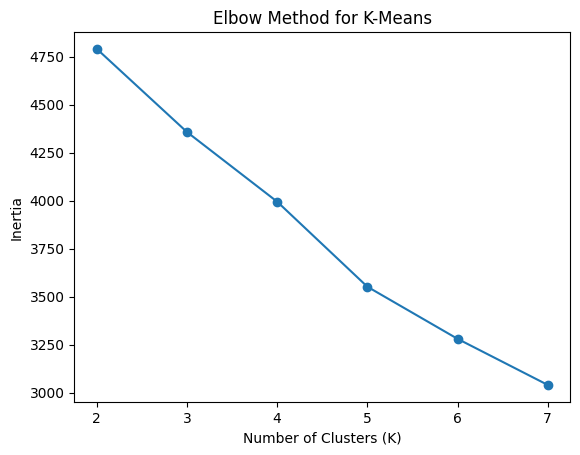

In [1046]:
import matplotlib.pyplot as plt

inertia_vals = []

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster_scaled)
    inertia_vals.append(km.inertia_)

plt.plot(range(2, 8), inertia_vals, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()


# **WEB Start**

In [1047]:
import pickle


In [1048]:
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(log_model, f)


In [1049]:
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)


In [1050]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [1051]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=ordinal_categories)


In [1052]:
with open("ordinal_encoder.pkl", "wb") as f:
    pickle.dump(oe, f)


In [1053]:
X = df_ml.drop(columns=["productivity_satisfaction"])


In [1054]:
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)


In [1055]:
import os

os.listdir()


['.config',
 'scaler.pkl',
 'ordinal_encoder.pkl',
 'MLDataset.csv',
 'logistic_model.pkl',
 'feature_columns.pkl',
 'kmeans_model.pkl',
 'sample_data']